In [2]:
%matplotlib notebook 

import numpy
import matplotlib.pyplot as plot

In [3]:
import matplotlib
matplotlib.rc('text', usetex=True)

In [4]:
numpy.random.seed(1234)

In [13]:
# data set generation
n_dim = 2

n_mean1 = numpy.array([-1., -1.])
n_cov1 = numpy.diag([0.5, .5])
n_mean2 = numpy.array([1., 1.])
n_cov2 = numpy.diag([0.5, .5])

p_mean1 = numpy.array([-1., 1.])
p_cov1 = numpy.diag([.5, .5])
p_mean2 = numpy.array([1., -1.])
p_cov2 = numpy.diag([.5, .5])

# generate postive examples
n_pos = 50
pos_y = numpy.ones(n_pos * 2) 
pos_x = numpy.concatenate([numpy.random.randn(n_pos, n_dim) * numpy.diag(p_cov1)[None, :] + p_mean1[None,:],
                           numpy.random.randn(n_pos, n_dim) * numpy.diag(p_cov2)[None, :] + p_mean2[None,:]])
n_pos *= 2
# generate negative examples
n_neg = 50
neg_y = numpy.zeros(n_neg * 2) 
neg_x = numpy.concatenate([numpy.random.randn(n_neg, n_dim) * numpy.diag(n_cov1)[None, :] + n_mean1[None,:],
                           numpy.random.randn(n_neg, n_dim) * numpy.diag(n_cov2)[None, :] + n_mean2[None,:]])
n_neg *= 2
# combine them
y = numpy.concatenate([pos_y, neg_y])
x = numpy.concatenate([pos_x, neg_x], axis=0)
# shuffle them
si = numpy.random.permutation(n_pos + n_neg)
y = y[si]
x = x[si]

# grab training examples
n_tra = numpy.round(0.5 * (n_pos + n_neg)).astype(numpy.int)

y_tra = y[:n_tra]
x_tra = x[:n_tra]

y_tes = y[n_tra:]
x_tes = x[n_tra:]

In [14]:
def perceptron(x, w, pre=False):
    def sign(y):
        return numpy.maximum(0., numpy.sign(y))
    
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sign(y)

In [15]:
def perceptron_dist(y, x, w, avg=False):
    y_ = perceptron(x, w)
    d = -(y - y_) * perceptron(x, w, pre=True)
    if not avg:
        return d
    return numpy.mean(d)

In [16]:
def perceptron_rule(y, x, w):
    y_ = perceptron(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y_tra - y_)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y_tra - pred_y)
    return dw

In [17]:
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

n_iter = 1000
eta = .1
old_cost = numpy.Inf
for ni in xrange(n_iter):
    pred_y = perceptron(x_tra, w)
    w += eta * perceptron_rule(y_tra, x_tra, w)
    cost = perceptron_dist(y_tra, x_tra, w, avg=True)
    print 'Perceptron cost {} after iteration {}'.format(cost, ni)
    if cost < 1e-16 or cost / old_cost >= 1.:
        print 'Converged'
        break
    old_cost = cost

Perceptron cost 0.827020644571 after iteration 0
Perceptron cost 0.803071545891 after iteration 1
Perceptron cost 0.779122447211 after iteration 2
Perceptron cost 0.755173348532 after iteration 3
Perceptron cost 0.731224249852 after iteration 4
Perceptron cost 0.707275151172 after iteration 5
Perceptron cost 0.683326052492 after iteration 6
Perceptron cost 0.659376953812 after iteration 7
Perceptron cost 0.635546099403 after iteration 8
Perceptron cost 0.61190503345 after iteration 9
Perceptron cost 0.588263967497 after iteration 10
Perceptron cost 0.564622901544 after iteration 11
Perceptron cost 0.540981835591 after iteration 12
Perceptron cost 0.517340769637 after iteration 13
Perceptron cost 0.493699703684 after iteration 14
Perceptron cost 0.470627435662 after iteration 15
Perceptron cost 0.449531768845 after iteration 16
Perceptron cost 0.428436102029 after iteration 17
Perceptron cost 0.407388908206 after iteration 18
Perceptron cost 0.386580889842 after iteration 19
Perceptron 

In [18]:
# visualize data 
def vis_data(x, y, c='r'):
    plot.hold('on')
    for x_, y_ in zip(x, y):
        plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')

In [19]:
def vis_hyperplane(w, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

<IPython.core.display.Javascript object>


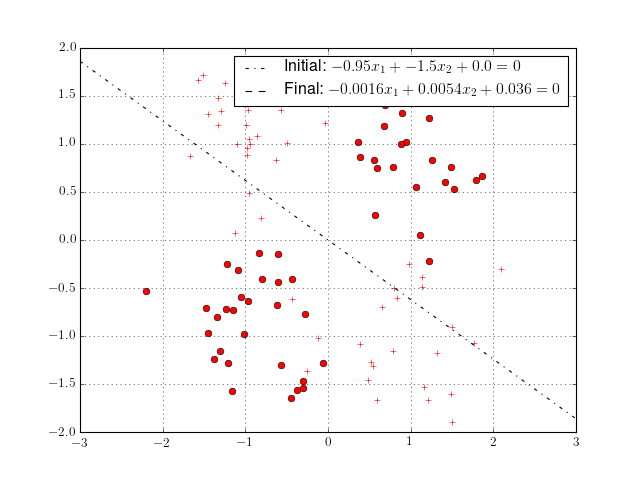

In [20]:
plot.figure()

vis_data(x_tra, y_tra, c='r')
#vis_data(x_tes, y_tes, c='b')

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')
plot.legend([plt0, plt1], [
        'Initial: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w0)),
        'Final: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w))],
           loc='best')

plot.show()

In [21]:
tra_er = numpy.sum(numpy.abs(perceptron(x_tra, w) - y_tra)) / numpy.float(len(y_tra))
tes_er = numpy.sum(numpy.abs(perceptron(x_tes, w) - y_tes)) / numpy.float(len(y_tes))

print 'Training error rate {}, Test error rate {}'.format(tra_er, tes_er)

Training error rate 0.52, Test error rate 0.48
